<a href="https://colab.research.google.com/github/gomontalvo/UNIR-AA-Actividad3/blob/main/UNIR_AA_Act3_1032g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNIR - MAESTRIA EN INTELIGENCIA ARTIFICIAL
#APRENDIZAJE AUTOMATICO
#DRA. MARIANA EDITH MIRANDA
#Realizado por:
# - Montalvo Riofrio Giovanny Omar
# - Villaseñor Salazar Humberto
#Actividad 3

Tareas que realizar:

    • Análisis descriptivo de los datos:
        ◦ De las variables numéricas, hallar datos estadísticos.
        ◦ De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas.
        ◦ Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analizar los resultados.

    • Tratamiento de missing. Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta.

    • Aplicar una técnica de detección de anomalías y explicar los resultados obtenidos.

    • Aplicar una técnica de agrupamiento, explicar la técnica y los resultados obtenidos.


En el siguiente notebook se van a analizar los datos del dataset **Cardiotocology**, el cual contiene información sobre de 2126 cardiotocografía (CTG) o monitorización fetal electrónica midiendo sus características diagnósticas, posteriormente, tres obstetras clasificaron los CTG y se asignó una clasificación consensuada a cada uno.

Las variables que componen el dataset son:

| **Nombre variable** | **Descripción** |
| --------------------|-----------------|
| *Suburb* | Suburbio |
| *FileName* | of CTG examination |
| *Date* | of the examination |
| *b* | start instant |
| *e* | end instant |
| *LBE* | baseline value (medical expert) |
| *LB* | baseline value (SisPorto) |
| *AC* | accelerations (SisPorto) |
| *FM* | foetal movement (SisPorto) |
| *UC* | uterine contractions (SisPorto) |
| *ASTV* | percentage of time with abnormal short term variability (SisPorto) |
| *mSTV* | mean value of short term variability (SisPorto)  |
| *ALTV* | percentage of time with abnormal long term variability (SisPorto) |
| *mLTV* | mean value of long term variability (SisPorto) |
| *DL* | light decelerations |
| *DS* | severe decelerations |
| *DP* | prolongued decelerations |
| *DR* | repetitive decelerations |
| *Width* | histogram width |
| *Min* | low freq. of the histogram |
| *Max* | high freq. of the histogram |
| *Nmax* | number of histogram peaks |
| *Nzeros* | number of histogram zeros |
| *Mode* | histogram mode |
| *Mean* | histogram mean |
| *Median* | histogram median |
| *Variance* | histogram variance |
| *Tendency* | histogram tendency: -1=left assymetric; 0=symmetric; 1=right | *assymetric |
| *A* | calm sleep |
| *B* | REM sleep |
| *C* | calm vigilance |
| *D* | active vigilance |
| *SH* | shift pattern (A or Susp with shifts) |
| *AD* | accelerative/decelerative pattern (stress situation) |
| *DE* | decelerative pattern (vagal stimulation) |
| *LD* | largely decelerative pattern |
| *FS* | flat-sinusoidal pattern (pathological state) |
| *SUSP* | suspect pattern |
| *CLASS* | Class code (1 to 10) for classes A to SUSP |
| *NSP* | Normal=1; Suspect=2; Pathologic=3 |


### IMPORTACION DE LIBRERIAS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import math

from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


###CARGAR GOOGLE DRIVE PARA LECTURA DE DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###CARGAR DATASET

In [ ]:
#!ls "/content/drive/MyDrive/MisDataset"
#

ALLFLOWMETER_HIKARI2021.csv  bmd.csv  CTG.csv  malicious_phish.csv


In [3]:
data = pd.read_csv('/content/drive/MyDrive/School/UNIR/Aprendizaje Autonomo/Tarea 3/CTG.csv')
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured.
# The CTGs were also classified by three expert obstetricians and a consensus classification label assigned
# to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …)
# and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.
#
#data = pd.read_csv('/content/drive/MyDrive/MisDataset/CTG.csv')
#data

In [4]:
#Tamaño del dataset
data.shape

(2129, 40)

In [5]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa


**OBSERVACIONES:**

#### En primera instancia, las variables tipo objeto se descartan del analisis dado que son archivos de referencia que no cambian los datos descritos en cada ocurrencia.


| **Tipo** | **Nombres de columnas** |
|----------|-------------------------|
| *object* | Filename, Date, SegFile |
| *float64* | El resto*              |

In [6]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### 1. ANALISIS DESCRIPTIVO DE DATOS

In [7]:
data1 = data.drop(columns=['FileName','Date', 'SegFile'])
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.00,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.00,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.00,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.70,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.00,91.0


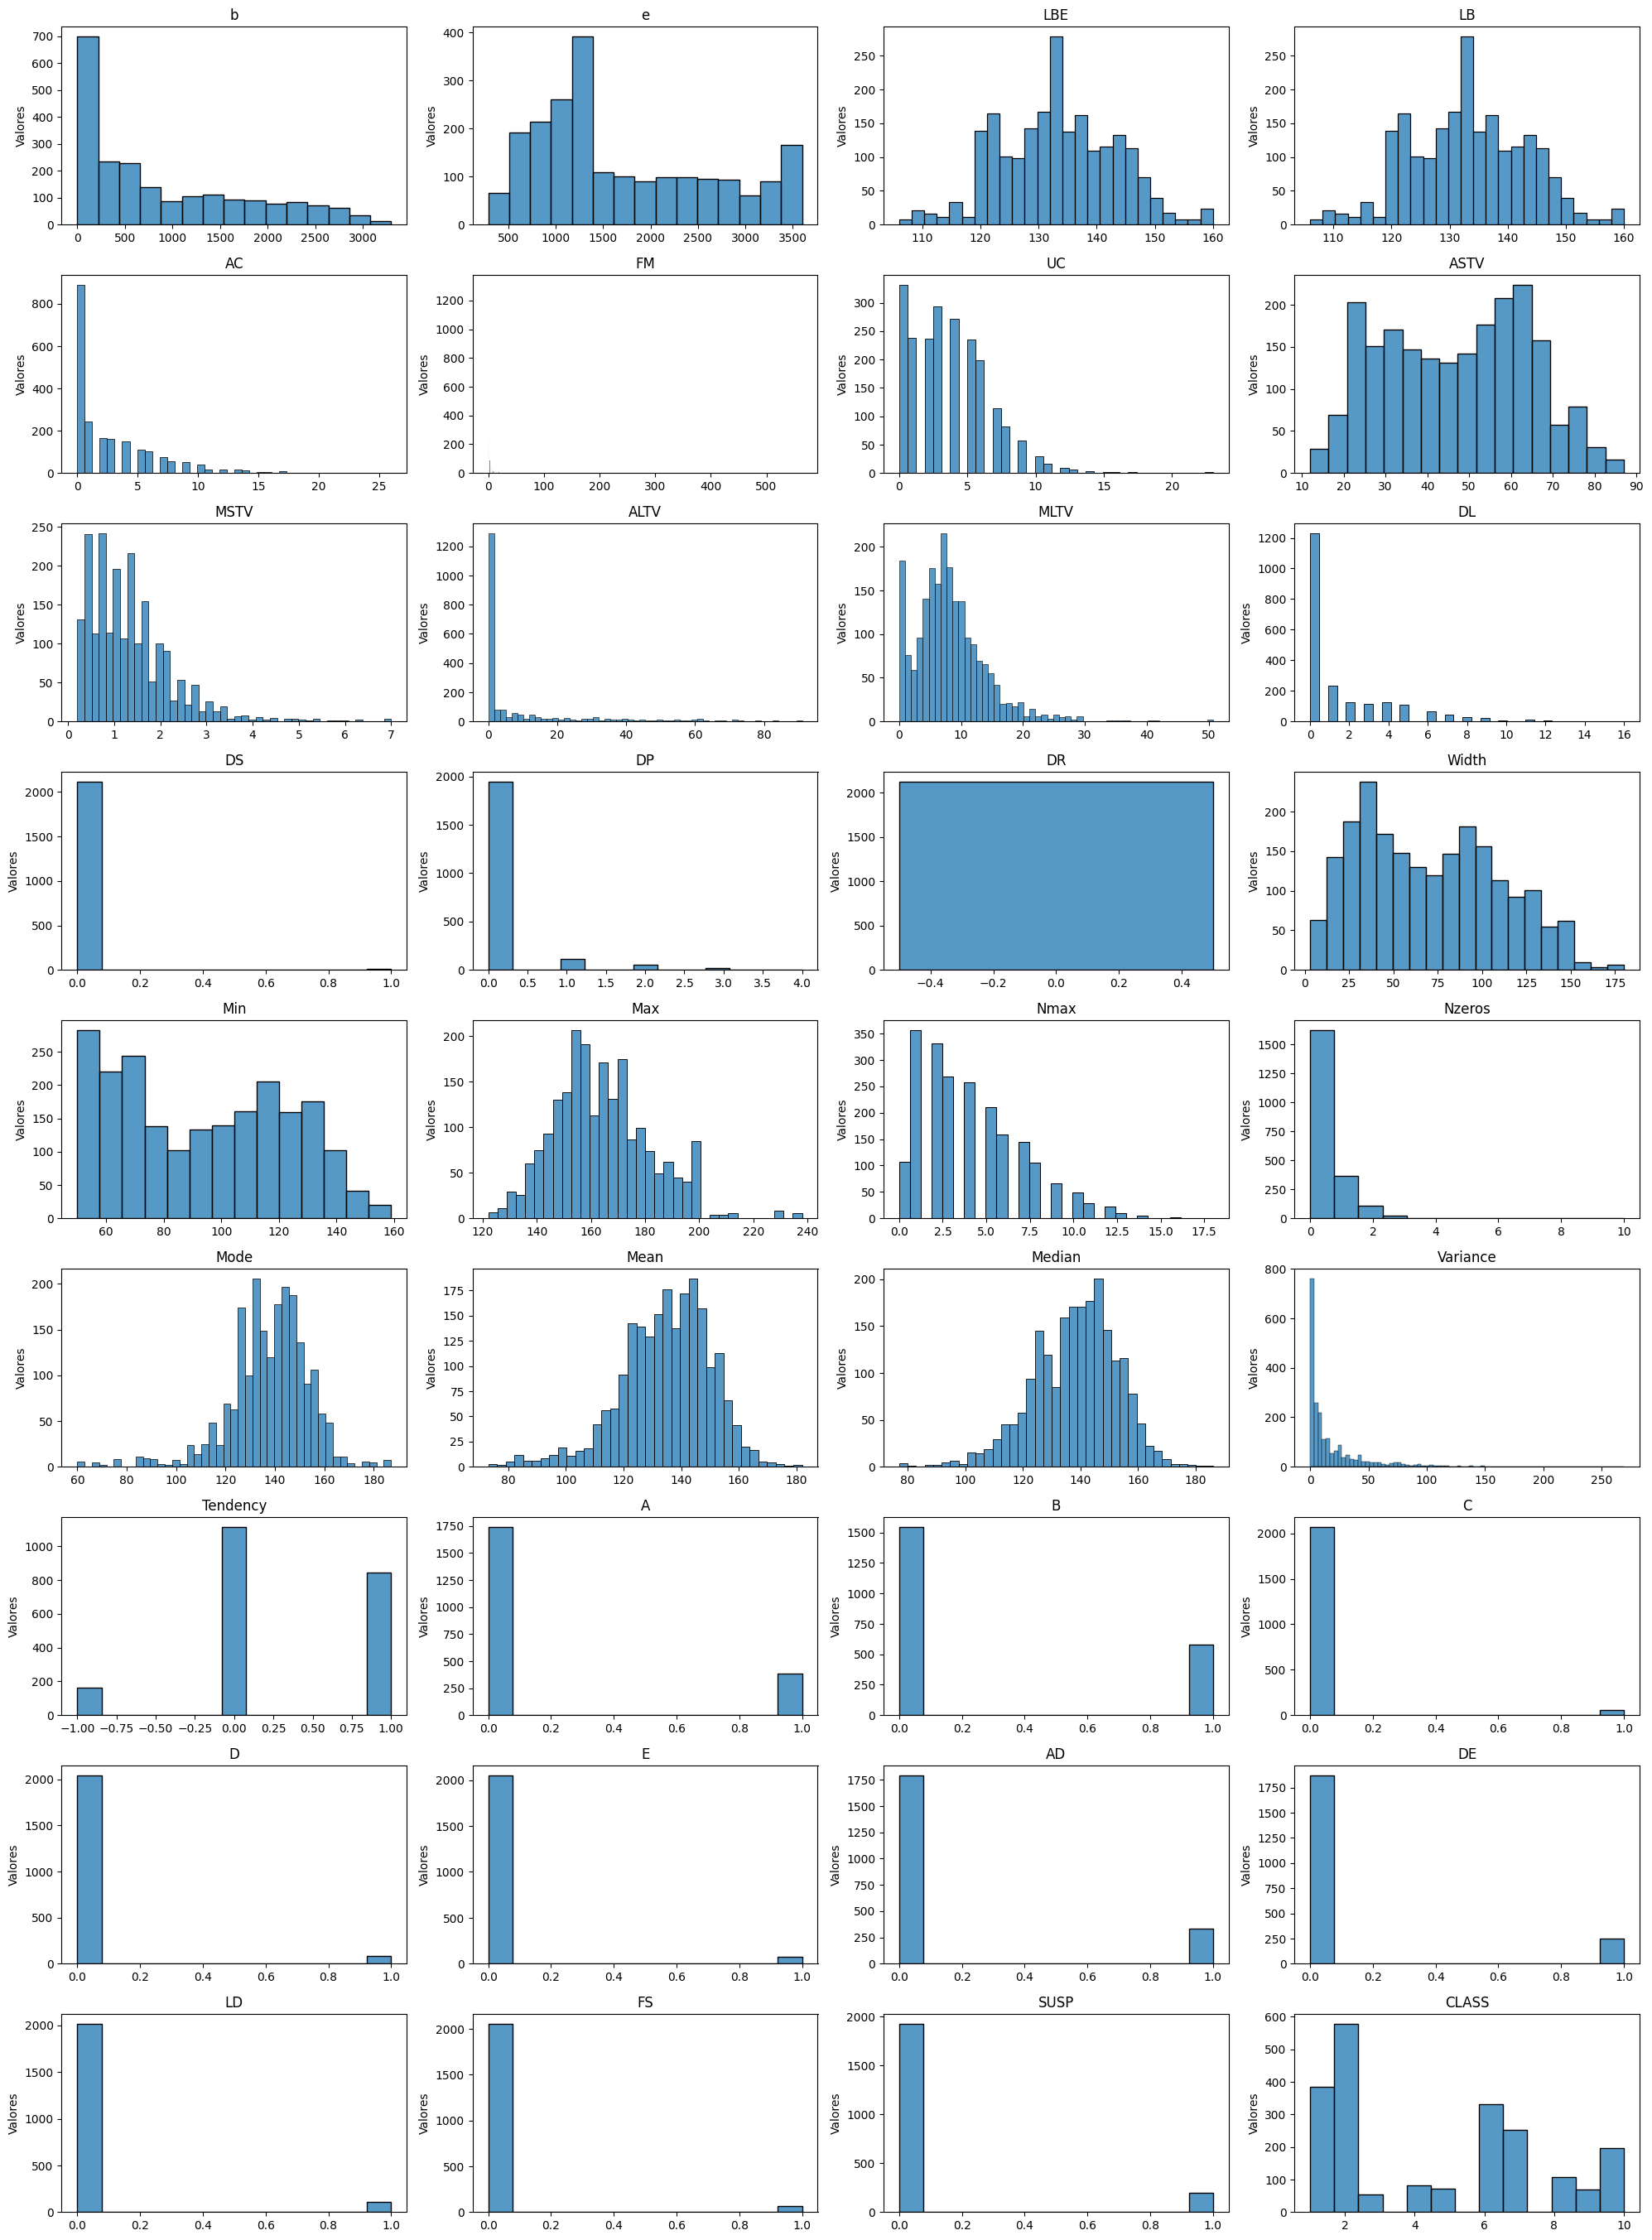

In [8]:
lst_contvar_out = data1.drop(columns='NSP')
#lst_contvar_out.remove('NSP')

ncols = 4
nrows = math.ceil(len(lst_contvar_out) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
ax = ax.flatten()  # para iterar fácilmente, sin usar [j][i]

for i, col_ in enumerate(lst_contvar_out):
    sns.histplot(data1[col_], ax=ax[i])
    ax[i].set_title(col_)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Valores")

# Eliminar los ejes vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Se puede observar que los tipos de variables que existen en el *dataframe* aunque sean discretos (float), algunos toman valores de (0,1),(-1,0,1), (0,1,2) o (0,1,2,3) y podrian considerarse como categoricas:

| **Tipo**     | **Nombres de columnas**                                   |
|--------------|-----------------------------------------------------------|
| *Categorica* | DS, DP, Tendency, A, B, C, D, E, AD, DE, LD, FS, SUSP,    |
| *Discreta*   | b,e,LBE, LB, AC,FM,UC, ASTV, MSTV, ALTV, MLTV, DL, DR, With, Min,Max, Nmax, Nzeros, Mode, Mean, Median, Variance, CLASS              |


### Verificamos correlacion

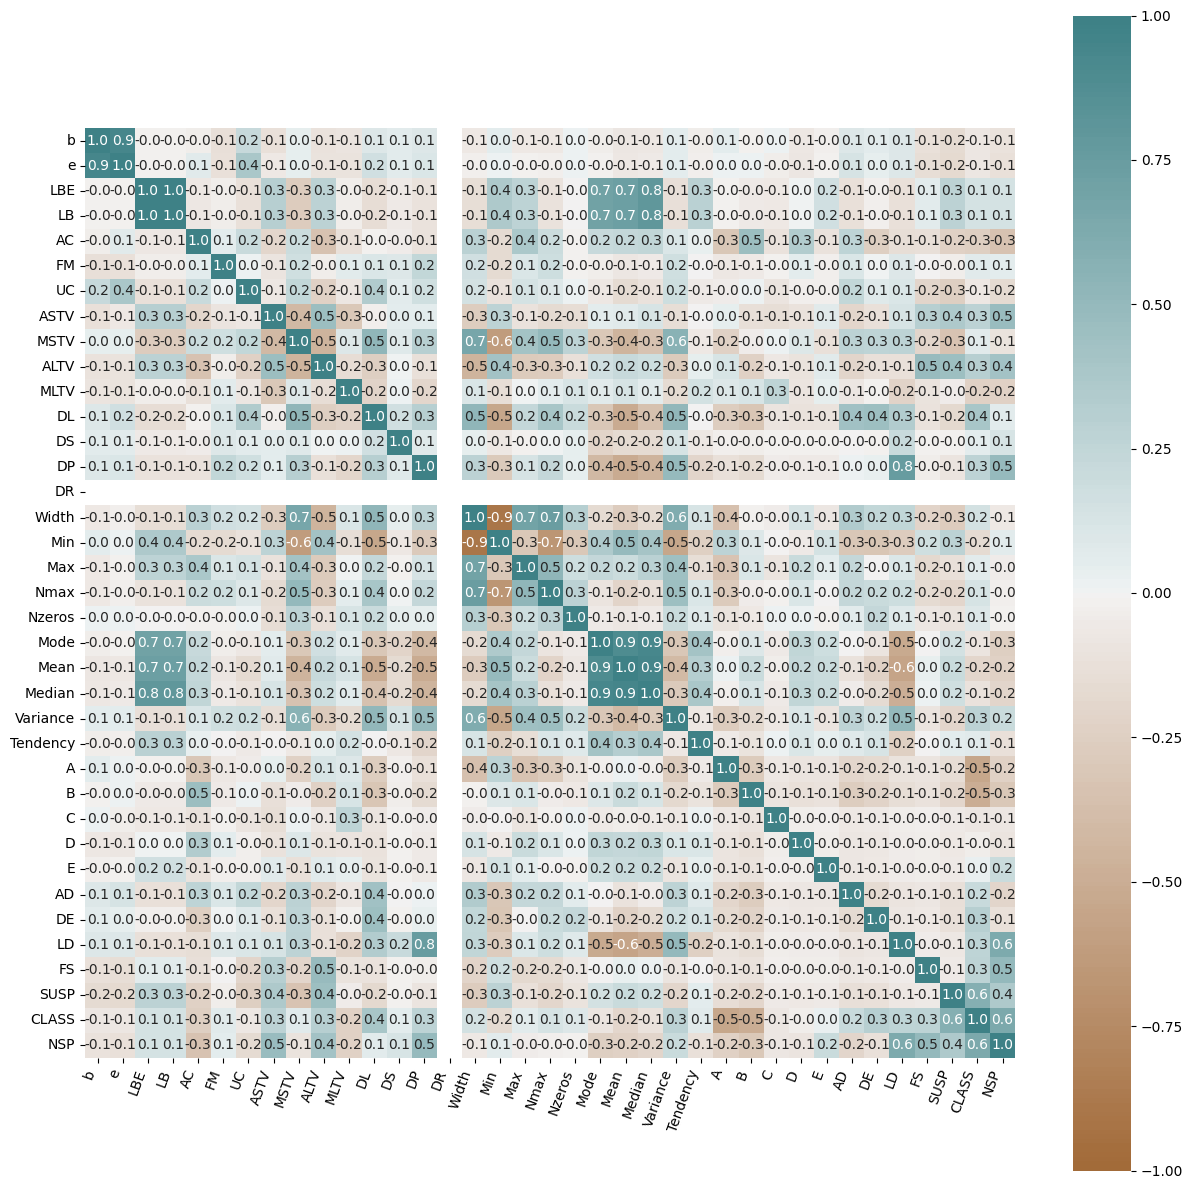

In [9]:
df_clean = data1.copy()

corr= df_clean.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 200, n=200),
    square=True,
    annot = True, fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);

In [10]:
data1['FM'].sample(20)

,FM
1100,0.0
2020,0.0
913,0.0
388,2.0
497,54.0
1511,0.0
1639,2.0
1391,0.0
942,0.0
358,11.0


In [11]:
data1['DR'].sample(20)

,DR
597,0.0
565,0.0
1920,0.0
1405,0.0
1345,0.0
1152,0.0
1987,0.0
911,0.0
979,0.0
104,0.0


**OBSERVACIONES:**
Se verifica que
* En el caso de b y e, tienen una alta correlacion entre ellos
* Dado que FM,DS,DR no tienen mucha correlacion con NSP y muy pocos datos distintos de 0, se eliminara del dataframe a analizar

In [12]:
data_clean = data1.drop(columns=['FM','DR','DS'])

#### 2. TRATAMIENTO DE DATOS FALTANTES (MISSING)

In [13]:
# Verificacion de valores nulos
count_null = data_clean.isnull().sum()
cols_null = count_null[count_null > 0]
#cols_null = (cols_null / data1.shape[0]) * 100
display(cols_null)

,0
b,3
e,3
LBE,3
LB,3
AC,3
UC,2
ASTV,2
MSTV,2
ALTV,2
MLTV,2


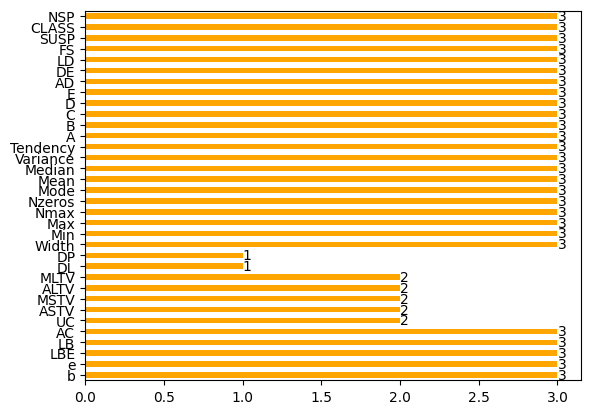

In [14]:
ax = cols_null.plot.barh(color='orange', rot=0)
ax = ax.bar_label(ax.containers[0])

Se verifican y se puede aplicar de acuerdo a su distribucion el reemplazo de valores nulos:

PROMEDIO: LBE, LB, DS, DP, Width, Min, Max

MEDIANA: b,e, AC, UC, ALTV, MLTV, DL, Nzeros, Median, Variance, Tendency, A, B, C, D, E,AD,DE,LD,FS,SUSP,CLASS

MODA: ASTV, MSTV, Mode

In [15]:
data1_clean = data_clean.dropna()
data1_clean.shape

data1_clean.head()

,b,e,LBE,LB,AC,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
count_null = data1_clean.isnull().sum()
cols_null = count_null[count_null > 0]
#cols_null = (cols_null / data1.shape[0]) * 100
display(cols_null)

,0


**OBSERVACIONES:**

Dado que la cantidad de registros eran muy pocos para el universo de datos, s eliminaron datos NAN del dataframe y se verifica que no existen valores adicionales a tratar.

Queda listo para aplicar en adelante los modelos: **data1_clean**

In [16]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   UC        2126 non-null   float64
 6   ASTV      2126 non-null   float64
 7   MSTV      2126 non-null   float64
 8   ALTV      2126 non-null   float64
 9   MLTV      2126 non-null   float64
 10  DL        2126 non-null   float64
 11  DP        2126 non-null   float64
 12  Width     2126 non-null   float64
 13  Min       2126 non-null   float64
 14  Max       2126 non-null   float64
 15  Nmax      2126 non-null   float64
 16  Nzeros    2126 non-null   float64
 17  Mode      2126 non-null   float64
 18  Mean      2126 non-null   float64
 19  Median    2126 non-null   float64
 20  Variance  2126 non-null   float64
 

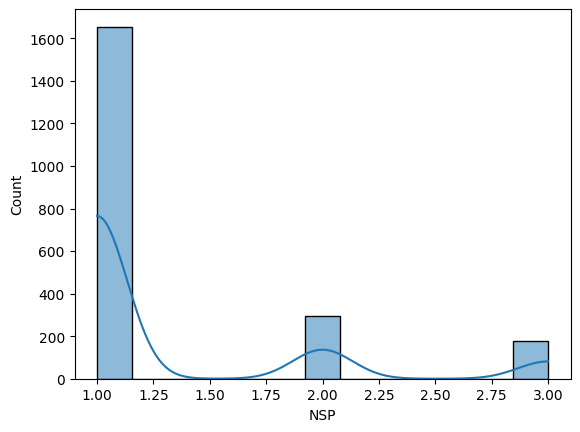

In [17]:
lst_y = ['NSP']

# Se grafica la variable target mediante un histograma
sns.histplot(data1_clean['NSP'], kde=True)
plt.show()

###3. APLICACION DE TECNICA DE DETECCION DE ANOMALIAS

**3.1 Por Atributos**

A continuación se presenta la identificación de variables atípicos seleccionados a partir de los resultados de la matriz de la correlación por medio de dos métodos: intercuantil y z-score (desviación estandar).

Las variables con un alto grado de correlación son las siguientes:
| **Variable 1**|**Variable 2 con  0.9** |
|------|------------------------|
| b    | e    |
| mode | mean |
| mode | median |

| **Variable 1**|**Variable 2 con  0.8** |
|------|------------------------|
| Median    | LBE    |
| Median    | LB     |
| LD        | DP     |

| **Variable 1**|**Variable 2 con  0.7** |
|------|------------------------|
| Width    | MSTV    |
| Width    | Max     |
| Width    | NMAX    |
| Mode     | LBE     |
| Mode     | LB      |
| Mean     | LBE     |
| Mean     | LB      |

Como se puede observar, se tiene un total de 13 correlaciones dando un total de 26 variables, sin embargo, existen variables que se repiten por lo que el estudio de atributos se reduce a 12 variable, las cuales son:

| **Variables**|
|--------------|
| b            |
| e            |
| mode         |
| mean         |
| median       |
| LBE          |
| LB           |
| LD           |
| DP           |
| Width        |
| MSTV         |
| Max          |
| Nmax         |

In [18]:

#Lista de Variables con Correlación 0.9
Lista_9 = ['b', 'e', 'Mode', 'Mean','Median']
L9 = data1_clean[Lista_9].columns.to_list()

#Lista de Variables con Correlación 0.8
Lista_8 = ['LBE', 'LB', 'LD', 'DP']
L8 = data1_clean[Lista_8].columns.to_list()

#Lista de Variables con Correlación 0.7
Lista_7 = ['Width', 'Max', 'Nmax']
L7 = data1_clean[Lista_7].columns.to_list()

#Sumatoria de las listas de variables de correlación
SL = L9 + L8 + L7

#Listado de variables Total
LT = data1_clean.select_dtypes(include=int).columns.to_list()+data1_clean.select_dtypes(include=float).columns.to_list()

**3.1.1 Método intercuantil**

En este espacio se realiza el método intercuantil, el cual esta divido en tres segmentos de código: L9 con mayor correlación, L8 y L7 con un valor menor de correlación pero que es importante como es el comportamiento de los valores atípicos.

In [19]:
def out_iqr(df , column):
    global lower,upper
    # Calculo de los cuartiles Q1 (percentil 25) y Q3 (percentil 75)
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    # Calculo del rango intercuantilico, IQR
    IQR = Q3 - Q1
    # Límite para los outliers
    cut_off = IQR * 1.5
    # Calculo de los limites superior e inferior
    lim_inf = max(Q1 - cut_off, min(df[column]))
    lim_sup = Q3 + cut_off

    print(f'IQR: {IQR:.2f} \t limite inferior: {lim_inf:.2f} \t limite superior {lim_sup:.2f}')
    # Calculo del número de registros por debajo y por encima de los valores, respectivamente
    df1 = df[df[column] > lim_sup]
    df2 = df[df[column] < lim_inf]
    total_outliers =  df1.shape[0] + df2.shape[0]
    return print(f'Número total de outliers detectados: {total_outliers}')

In [20]:
for col in list(data1_clean[L9].columns):
  print(col)
  out_iqr(data1_clean[L9], col)
  print(25*'--')
  print(25*'--')

b
IQR: 1466.00 	 limite inferior: 0.00 	 limite superior 3720.00
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
e
IQR: 1425.75 	 limite inferior: 287.00 	 limite superior 4573.38
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
Mode
IQR: 19.00 	 limite inferior: 100.50 	 limite superior 176.50
Número total de outliers detectados: 73
--------------------------------------------------
--------------------------------------------------
Mean
IQR: 20.00 	 limite inferior: 95.00 	 limite superior 175.00
Número total de outliers detectados: 45
--------------------------------------------------
--------------------------------------------------
Median
IQR: 19.00 	 limite inferior: 100.50 	 limite superior 176.50
Número total de outliers detectados: 28
--------------------------------------------------
---------

In [21]:
for col in list(data1_clean[L8].columns):
  print(col)
  out_iqr(data1_clean[L8], col)
  print(25*'--')
  print(25*'--')

LBE
IQR: 14.00 	 limite inferior: 106.00 	 limite superior 161.00
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
LB
IQR: 14.00 	 limite inferior: 106.00 	 limite superior 161.00
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
LD
IQR: 0.00 	 limite inferior: 0.00 	 limite superior 0.00
Número total de outliers detectados: 107
--------------------------------------------------
--------------------------------------------------
DP
IQR: 0.00 	 limite inferior: 0.00 	 limite superior 0.00
Número total de outliers detectados: 178
--------------------------------------------------
--------------------------------------------------


In [22]:
for col in list(data1_clean[L7].columns):
  print(col)
  out_iqr(data1_clean[L7], col)
  print(25*'--')
  print(25*'--')

Width
IQR: 63.00 	 limite inferior: 3.00 	 limite superior 194.50
Número total de outliers detectados: 0
--------------------------------------------------
--------------------------------------------------
Max
IQR: 22.00 	 limite inferior: 122.00 	 limite superior 207.00
Número total de outliers detectados: 24
--------------------------------------------------
--------------------------------------------------
Nmax
IQR: 4.00 	 limite inferior: 0.00 	 limite superior 12.00
Número total de outliers detectados: 19
--------------------------------------------------
--------------------------------------------------


**3.1.2 Método desviación estándar**

Este método esta estructurado de manera muy similar con la técnica intercuantil, permitiendo analizar las diferencias o similitudes encontradas en cada una de ellas.

In [23]:
def out_std(df, column):
    global lower,upper
    # cálculo de la media y desviación estándar
    data_mean, data_std = data1_clean[column].mean(), data1_clean[column].std()
    # calculo del punto de corte
    cut_off = data_std * 3
    # Cálculo de los limites inferior y superior
    lim_inf = data_mean - cut_off
    lim_sup = data_mean + cut_off
    print(f'Límite inferior {lim_inf:.2f} \t Limite superior {lim_sup:.2f}')
    # cálculo del número de registros por debajo y por encima.
    df1 = df[df[column] < lim_inf]
    df2 = df[df[column] > lim_sup]
    return print('Número total de outliers', df1.shape[0]+ df2.shape[0])

In [24]:
for col in list(data1_clean[L9].columns):
  print(col)
  out_std(data1_clean[LT], col)
  print(25*'--')

b
Límite inferior -1803.81 	 Limite superior 3560.69
Número total de outliers 0
--------------------------------------------------
e
Límite inferior -1089.88 	 Limite superior 4495.63
Número total de outliers 0
--------------------------------------------------
Mode
Límite inferior 88.31 	 Limite superior 186.60
Número total de outliers 39
--------------------------------------------------
Mean
Límite inferior 87.83 	 Limite superior 181.39
Número total de outliers 26
--------------------------------------------------
Median
Límite inferior 94.69 	 Limite superior 181.49
Número total de outliers 16
--------------------------------------------------


In [25]:
for col in list(data1_clean[L8].columns):
  print(col)
  out_std(data1_clean[LT], col)
  print(25*'--')

LBE
Límite inferior 103.78 	 Limite superior 162.83
Número total de outliers 0
--------------------------------------------------
LB
Límite inferior 103.78 	 Limite superior 162.83
Número total de outliers 0
--------------------------------------------------
LD
Límite inferior -0.61 	 Limite superior 0.71
Número total de outliers 107
--------------------------------------------------
DP
Límite inferior -1.27 	 Limite superior 1.52
Número total de outliers 69
--------------------------------------------------


In [26]:
for col in list(data1_clean[L7].columns):
  print(col)
  out_std(data1_clean[LT], col)
  print(25*'--')

Width
Límite inferior -46.42 	 Limite superior 187.31
Número total de outliers 0
--------------------------------------------------
Max
Límite inferior 110.19 	 Limite superior 217.86
Número total de outliers 14
--------------------------------------------------
Nmax
Límite inferior -4.78 	 Limite superior 12.92
Número total de outliers 19
--------------------------------------------------


Es importante mencionar que los resultados de los valores atípicos en la **técnica de desviación estádar** presenta un reducción de valores en la mayoría de las variables:

| **Variable** | **Valor en Técnica Intercuantil** | **Valor en Técnica de Desviación Estándar |
|----------|---------|----------------|
| *Mode* | 73 | 39 |
| *Mean* | 45 | 26 |
| *Median* | 28 | 16 |
| *DP* | 178 | 69 |
| *Max* | 29 | 14 |


**3.2 Detección de anomalias por instancias**

En contraste del punto pasado donde se realizaba el análisis individual de las variables con mayor distinción en la matriz de correlación, la detección de *outliers* establece por medio de diferentes técnicas el estudio y comportamiento de estas anomalias a tráves de los datos proporcionados por el *dataset*.

**3.2.1 Método Isolation Forest**

Por medio de esta técnica se establece los siguientes parametros:

| **Parametros** | **Valor** |
|----------------|-----------|
| Contamination  | 0.05      |
| Semilla        | 42        |

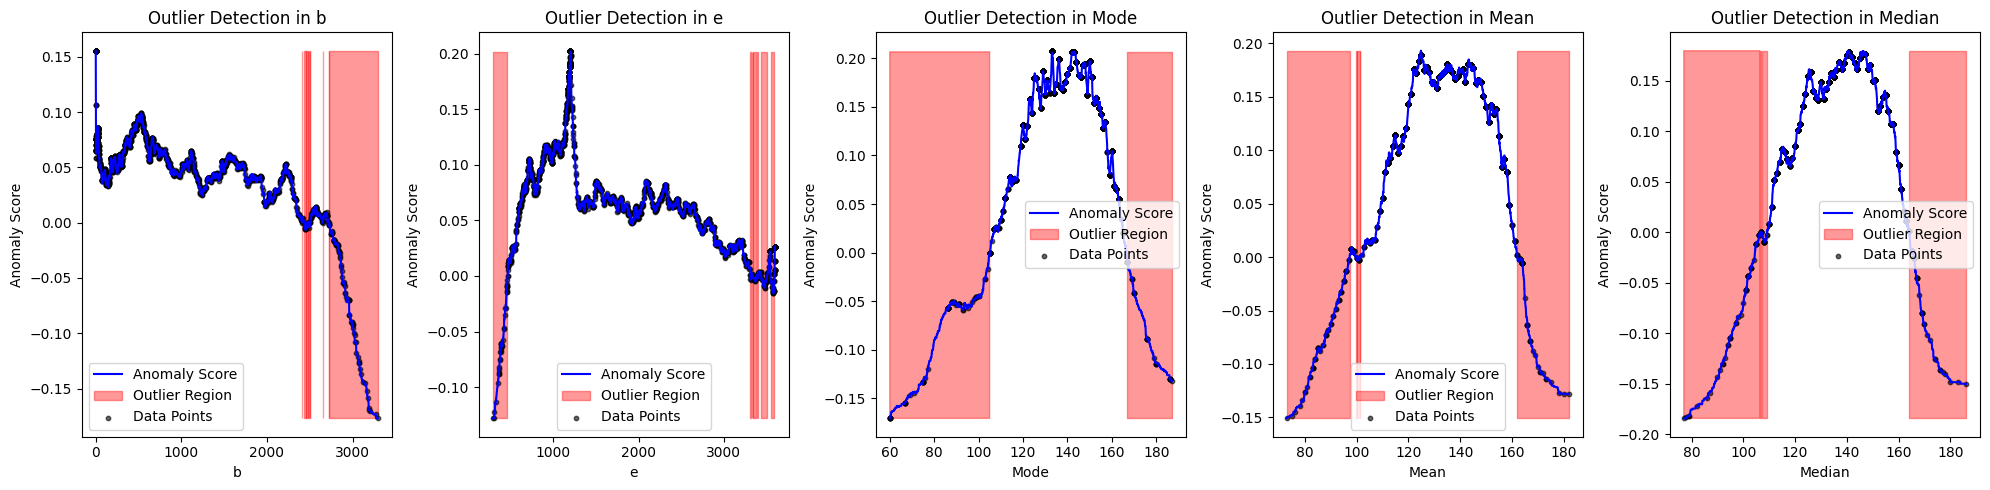

In [27]:
fig, axs = plt.subplots(1, len(L9), figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(L9):
    #isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(data1_clean[column].values.reshape(-1, 1))

    # Se genera un conjunto de valores en el mismo rango que la variable
    xx = np.linspace(data1_clean[column].min(), data1_clean[column].max(), len(data1_clean[L9])).reshape(-1,1)

    # Calculamos la puntuación de anomalía
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    # Graficamos los resultados
    axs[i].plot(xx, anomaly_score, label='Anomaly Score', color='blue')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='red', alpha=0.4, label='Outlier Region')

    # Añadir scatter plot con los datos reales y su puntuación de anomalía
    data_anomaly_score = isolation_forest.decision_function(data1_clean[column].values.reshape(-1, 1))
    axs[i].scatter(data1_clean[column], data_anomaly_score, color='black', s=10, alpha=0.6, label='Data Points')


    axs[i].legend()
    axs[i].set_title(f"Outlier Detection in {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Anomaly Score")

plt.tight_layout()
plt.show()

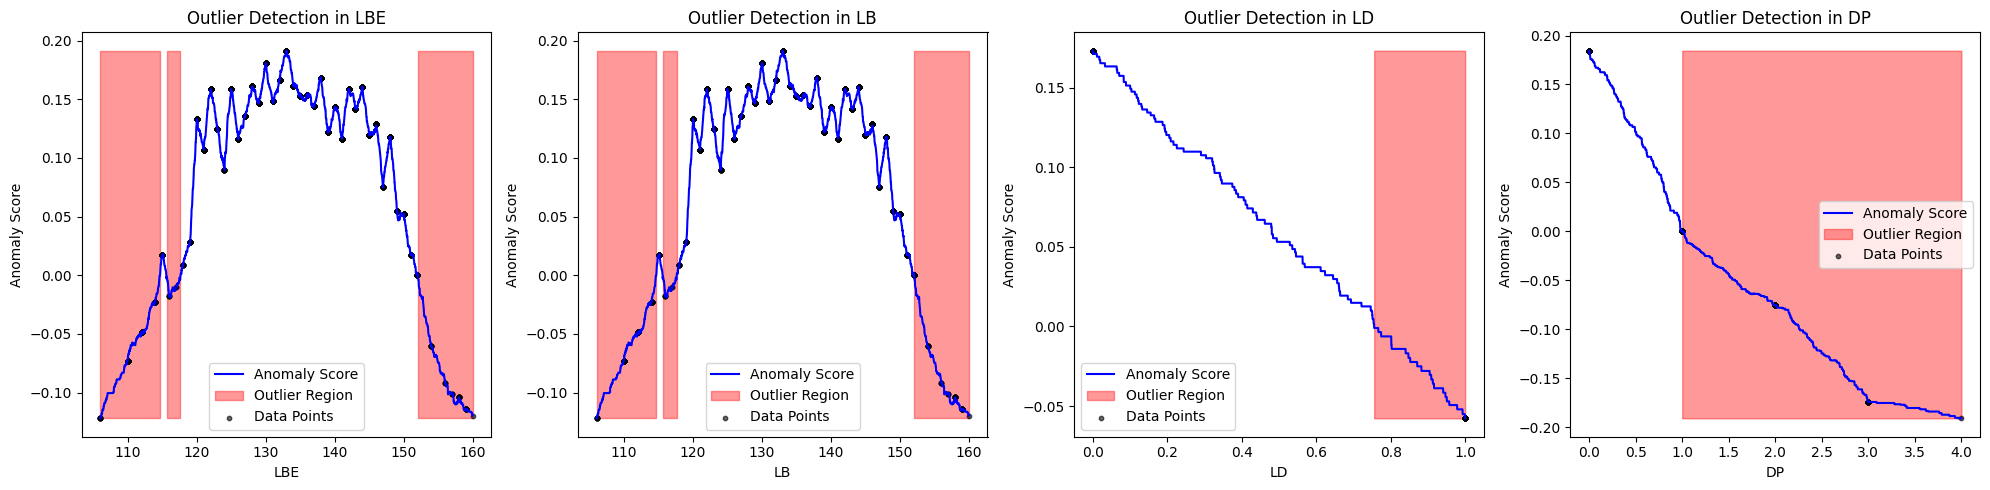

In [28]:
fig, axs = plt.subplots(1, len(L8), figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(L8):
    #isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(data1_clean[column].values.reshape(-1, 1))

    # Se genera un conjunto de valores en el mismo rango que la variable
    xx = np.linspace(data1_clean[column].min(), data1_clean[column].max(), len(data1_clean[L9])).reshape(-1,1)

    # Calculamos la puntuación de anomalía
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    # Graficamos los resultados
    axs[i].plot(xx, anomaly_score, label='Anomaly Score', color='blue')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='red', alpha=0.4, label='Outlier Region')

    # Añadir scatter plot con los datos reales y su puntuación de anomalía
    data_anomaly_score = isolation_forest.decision_function(data1_clean[column].values.reshape(-1, 1))
    axs[i].scatter(data1_clean[column], data_anomaly_score, color='black', s=10, alpha=0.6, label='Data Points')


    axs[i].legend()
    axs[i].set_title(f"Outlier Detection in {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Anomaly Score")

plt.tight_layout()
plt.show()

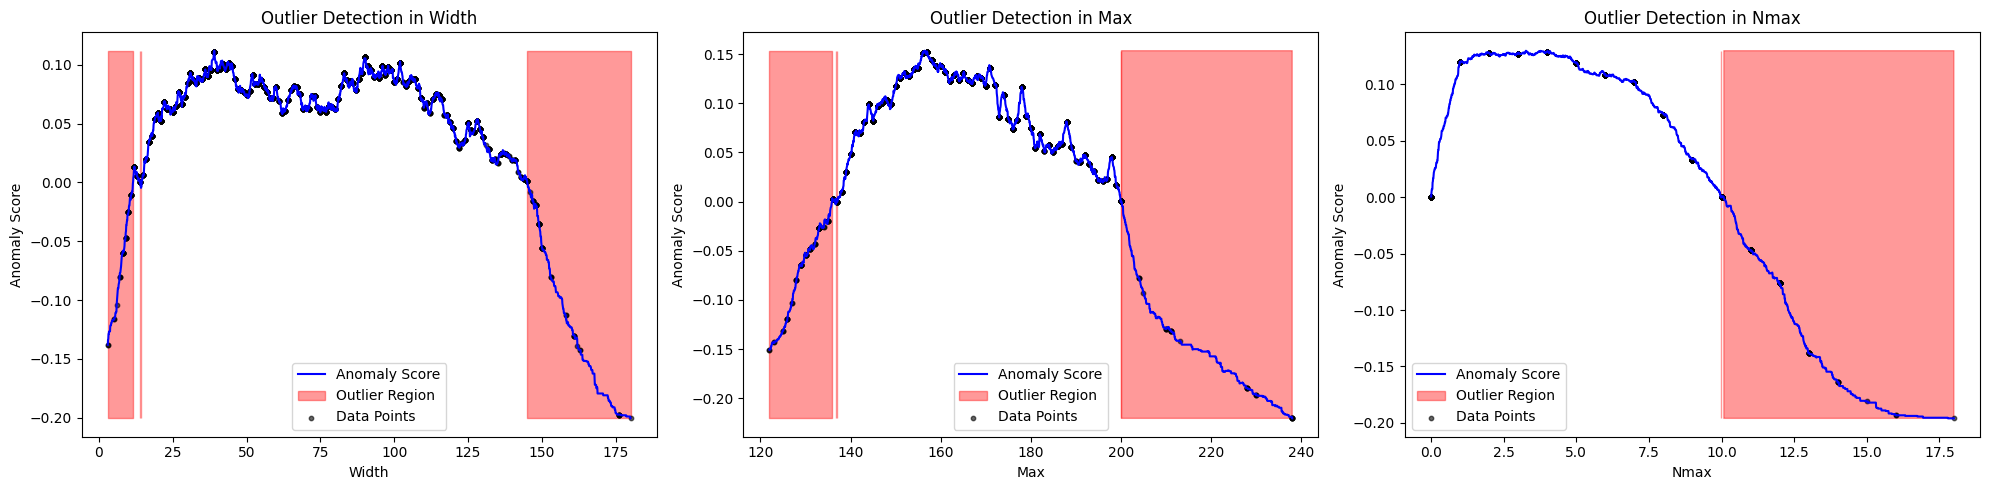

In [29]:
fig, axs = plt.subplots(1, len(L7), figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(L7):
    #isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest = IsolationForest(contamination=0.05, random_state=42)
    isolation_forest.fit(data1_clean[column].values.reshape(-1, 1))

    # Se genera un conjunto de valores en el mismo rango que la variable
    xx = np.linspace(data1_clean[column].min(), data1_clean[column].max(), len(data1_clean[L9])).reshape(-1,1)

    # Calculamos la puntuación de anomalía
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)

    # Graficamos los resultados
    axs[i].plot(xx, anomaly_score, label='Anomaly Score', color='blue')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                        where=outlier == -1, color='red', alpha=0.4, label='Outlier Region')

    # Añadir scatter plot con los datos reales y su puntuación de anomalía
    data_anomaly_score = isolation_forest.decision_function(data1_clean[column].values.reshape(-1, 1))
    axs[i].scatter(data1_clean[column], data_anomaly_score, color='black', s=10, alpha=0.6, label='Data Points')


    axs[i].legend()
    axs[i].set_title(f"Outlier Detection in {column}")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Anomaly Score")

plt.tight_layout()
plt.show()

**Unificación de variables**
Como se ha podido observar en la técnica de atributos y por medio de los gráficos con fondo rojo donde se presentan las regiones de anomalias se establece que las variables *b* (start instant), *e* (end instant), *mode* (histogram mode), *mean* (histogram mean)y *median* (histogram median) son las elegidas para los siguientes técnicas en las cuales se deben de correlacionar para generar el entrenamiento adecuando y establacer la inspección visual de las anomalías que se puedan presentar.

In [30]:
#Primer Insolation Forest con las variables b y e
#Se estipula DataIF1 y X_2 y_2
DataIF1 = data1_clean[['b', 'e','NSP']]
X_2 = DataIF1.iloc[:,:-1].to_numpy()
y_2 = DataIF1['NSP'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, stratify=y_2, random_state=42)

In [31]:
#Primer Insolation Forest con las variables b y e
#Se estipula DataIF1 y X_2 y_2
ift = IsolationForest(random_state=42)
ift.fit(X_2)

IsolationForest(random_state=42)

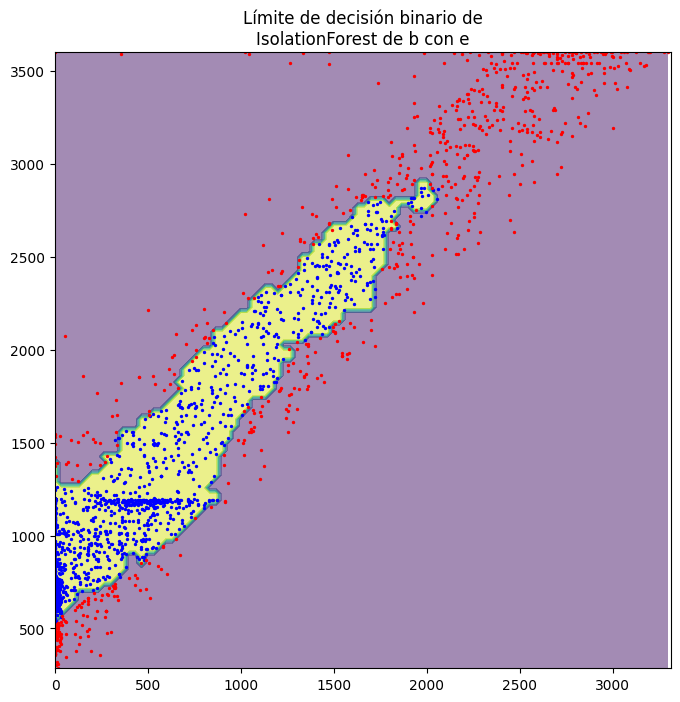

In [32]:
#Primer Insolation Forest con las variables b y e
#Se estipula DataIF1 y X_2 y_2
fig, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    ift,
    X_2,
    response_method="predict",
    alpha=0.5,
    ax=ax
)

clf_pred = ift.predict(X_2)
inliers = X_2[clf_pred == 1]
outliers = X_2[clf_pred == -1]

ax.scatter(inliers[:, 0], inliers[:, 1], c='blue', s=2, label='Inliers')
ax.scatter(outliers[:, 0], outliers[:, 1], c='red', s=2, label='Outliers')
ax.set_title("Límite de decisión binario de\nIsolationForest de b con e")
plt.axis("square")
plt.show()

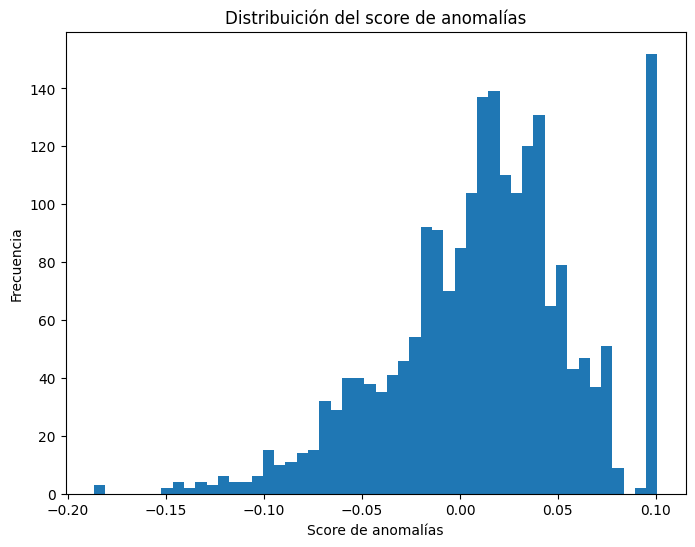

In [33]:
scores = ift.decision_function(X_2)

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50)
plt.title("Distribuición del score de anomalías")
plt.xlabel("Score de anomalías")
plt.ylabel("Frecuencia")
plt.show()

In [34]:
#Segundo Insolation Forest con las variables Mode y Mean
#Se estipula DataIF2 y X_3 y_3
DataIF2 = data1_clean[['Mode', 'Mean','NSP']]
X_3 = DataIF2.iloc[:,:-1].to_numpy()
y_3 = DataIF2['NSP'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, stratify=y_3, random_state=42)

In [35]:
#Segundo Insolation Forest con las variables Mode y Mean
#Se estipula DataIF2 y X_3 y_3
ift = IsolationForest(random_state=42)
ift.fit(X_3)

IsolationForest(random_state=42)

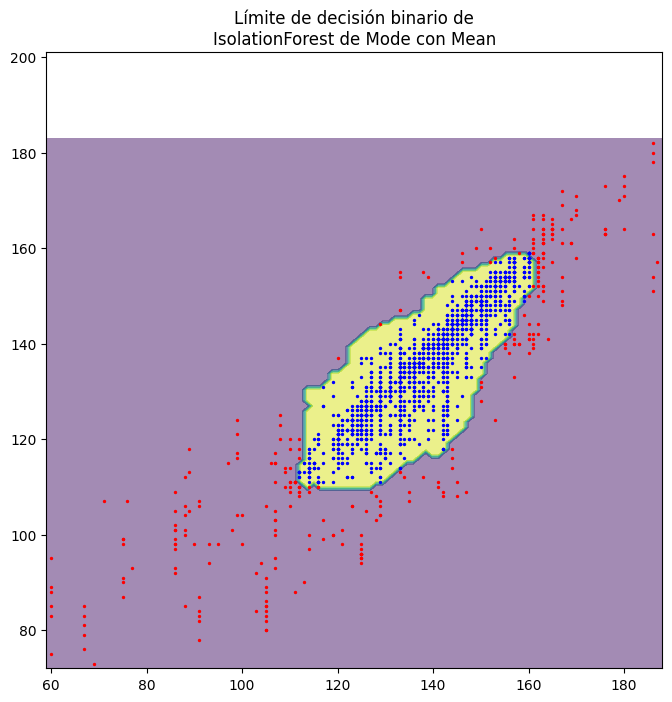

In [36]:
#Segundo Insolation Forest con las variables Mode y Mean
#Se estipula DataIF2 y X_3 y_3
fig, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    ift,
    X_3,
    response_method="predict",
    alpha=0.5,
    ax=ax
)

clf_pred = ift.predict(X_3)
inliers = X_3[clf_pred == 1]
outliers = X_3[clf_pred == -1]

ax.scatter(inliers[:, 0], inliers[:, 1], c='blue', s=2, label='Inliers')
ax.scatter(outliers[:, 0], outliers[:, 1], c='red', s=2, label='Outliers')
ax.set_title("Límite de decisión binario de\nIsolationForest de Mode con Mean")
plt.axis("square")
plt.show()

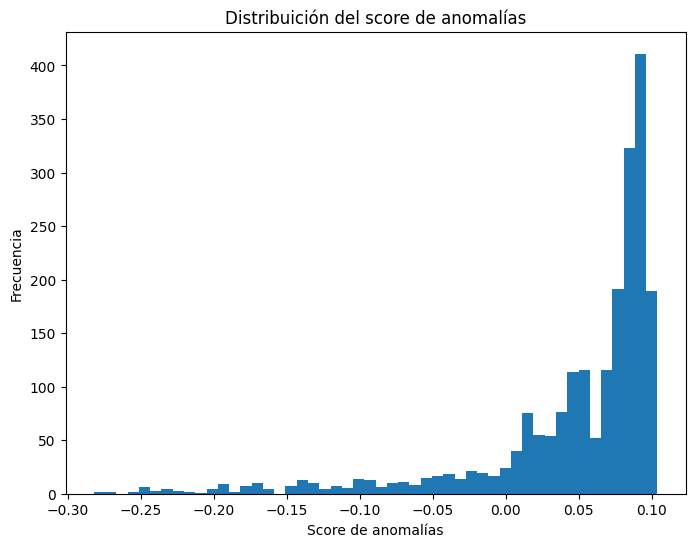

In [37]:
scores = ift.decision_function(X_3)

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50)
plt.title("Distribuición del score de anomalías")
plt.xlabel("Score de anomalías")
plt.ylabel("Frecuencia")
plt.show()

In [38]:
#Tercer Insolation Forest con las variables Median y Mode
#Se estipula DataIF3 y X_4 y_4
DataIF3 = data1_clean[['Median', 'Mode','NSP']]
X_4 = DataIF3.iloc[:,:-1].to_numpy()
y_4 = DataIF3['NSP'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, stratify=y_4, random_state=42)

In [39]:
#Tercer Insolation Forest con las variables Median y Mode
#Se estipula DataIF3 y X_4 y_4
ift = IsolationForest(random_state=42)
ift.fit(X_4)

IsolationForest(random_state=42)

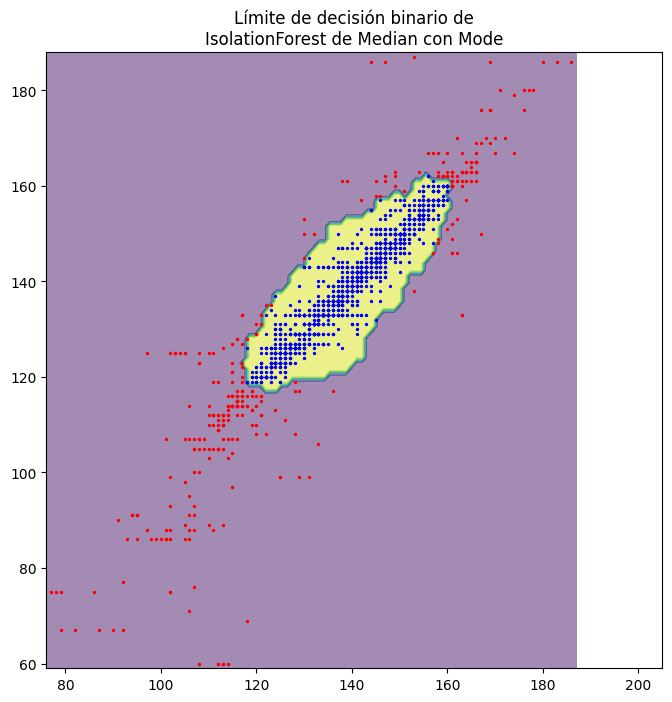

In [40]:
#Tercer Insolation Forest con las variables Median y Mode
#Se estipula DataIF3 y X_4 y_4
fig, ax = plt.subplots(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    ift,
    X_4,
    response_method="predict",
    alpha=0.5,
    ax=ax
)

clf_pred = ift.predict(X_4)
inliers = X_4[clf_pred == 1]
outliers = X_4[clf_pred == -1]

ax.scatter(inliers[:, 0], inliers[:, 1], c='blue', s=2, label='Inliers')
ax.scatter(outliers[:, 0], outliers[:, 1], c='red', s=2, label='Outliers')
ax.set_title("Límite de decisión binario de\nIsolationForest de Median con Mode")
plt.axis("square")
plt.show()

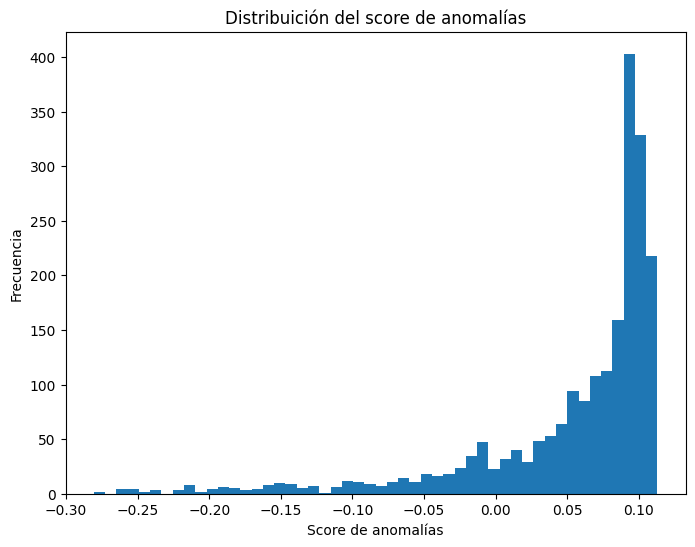

In [41]:
scores = ift.decision_function(X_4)

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50)
plt.title("Distribuición del score de anomalías")
plt.xlabel("Score de anomalías")
plt.ylabel("Frecuencia")
plt.show()

**3.2.2 Método Local Outlier Factor (LOF)**

Por medio de esta técnica se establece los siguientes parametros:

| **Parametros** | **Valor**       |
|----------------|-----------------|
| Contamination  | Automatica      |
| N neighbors    | 50              |

In [43]:
#Primer LOF con b y e
#Se establece LOF1 y X_2
lof = LocalOutlierFactor(n_neighbors=1000, contamination='auto')
DataLOF1 = data1_clean[['b', 'e','NSP']]
lof_pred1 = lof.fit_predict(DataLOF1.drop('NSP', axis=1))

#Segundo LOF con Mode y Mean
#Se establece LOF2 y X_3
lof = LocalOutlierFactor(n_neighbors=1000, contamination='auto')
DataLOF2 = data1_clean[['Mode', 'Mean','NSP']]
lof_pred2 = lof.fit_predict(DataLOF1.drop('NSP', axis=1))


#Tercer LOF con Mode y Median
#Se establece LOF3 y X_4
lof = LocalOutlierFactor(n_neighbors=1000, contamination='auto')
DataLOF3 = data1_clean[['Mode', 'Median','NSP']]
lof_pred3 = lof.fit_predict(DataLOF1.drop('NSP', axis=1))

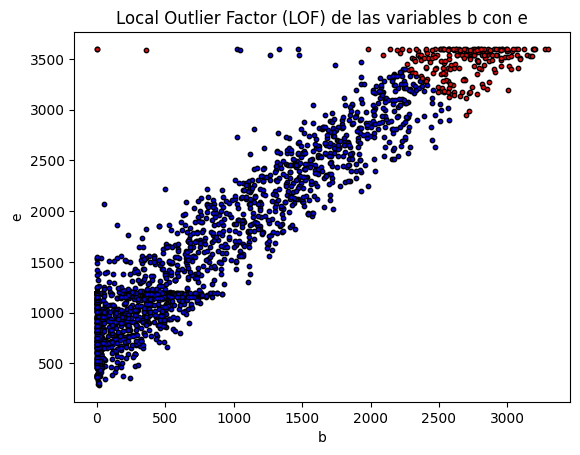

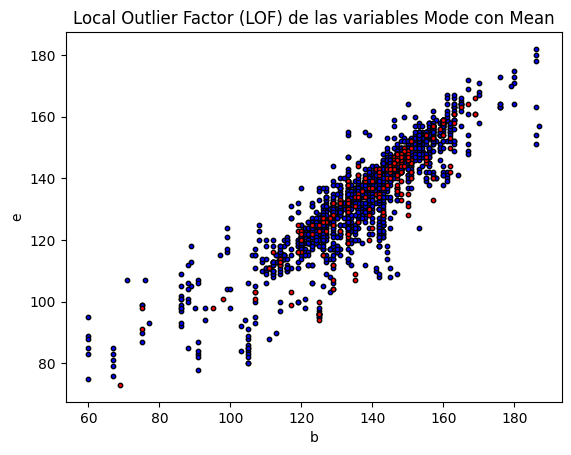

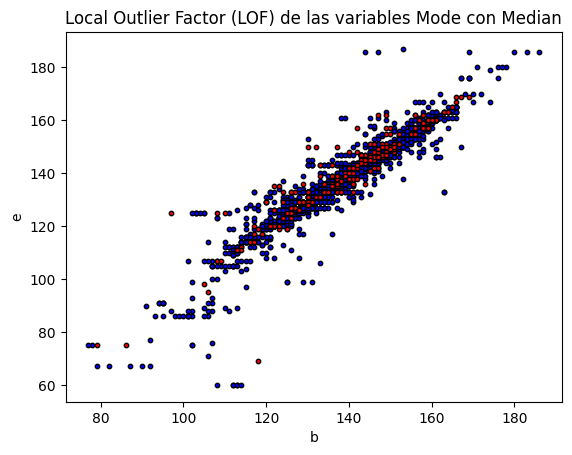

In [44]:
#Primer LOF
in_mask1 = [True if l == 1 else False for l in lof_pred1]
out_mask1 = [True if l == -1 else False for l in lof_pred1]

# inliers
a1 = plt.scatter(X_2[in_mask1, 0], X_2[in_mask1, 1], c = 'blue',
                edgecolor = 'k', s = 10)
# outliers
b1 = plt.scatter(X_2[out_mask1, 0], X_2[out_mask1, 1], c = 'red',
                edgecolor = 'k', s = 10)
plt.axis('tight')
plt.xlabel('b');
plt.ylabel('e');
plt.title("Local Outlier Factor (LOF) de las variables b con e")
plt.show()

#Segundo LOF
in_mask2 = [True if l == 1 else False for l in lof_pred2]
out_mask2 = [True if l == -1 else False for l in lof_pred2]

# inliers
a2 = plt.scatter(X_3[in_mask2, 0], X_3[in_mask2, 1], c = 'blue',
                edgecolor = 'k', s = 10)
# outliers
b2 = plt.scatter(X_3[out_mask2, 0], X_3[out_mask2, 1], c = 'red',
                edgecolor = 'k', s = 10)
plt.axis('tight')
plt.xlabel('b');
plt.ylabel('e');
plt.title("Local Outlier Factor (LOF) de las variables Mode con Mean")
plt.show()

#Tercero LOF
in_mask3 = [True if l == 1 else False for l in lof_pred3]
out_mask3 = [True if l == -1 else False for l in lof_pred3]

# inliers
a3 = plt.scatter(X_4[in_mask3, 0], X_4[in_mask3, 1], c = 'blue',
                edgecolor = 'k', s = 10)
# outliers
b3 = plt.scatter(X_4[out_mask3, 0], X_4[out_mask3, 1], c = 'red',
                edgecolor = 'k', s = 10)
plt.axis('tight')
plt.xlabel('b');
plt.ylabel('e');
plt.title("Local Outlier Factor (LOF) de las variables Mode con Median")
plt.show()

**3.2.3 Método OneClassSVM**

Por medio de esta técnica se establece los siguientes parametros:

| **Parametros** | **Valor**       |
|----------------|-----------------|
| Nu             | 0.05            |
| kernel         | rbf             |

In [45]:
#Primer SVM de las variables b con e
#Se asignan  one_SVM1, DataOCSVM1, onesvm_pred1
one_SVM1 = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
DataOCSVM1 = data1_clean[['b', 'e','NSP']]
one_SVM1.fit(DataOCSVM1.drop('NSP', axis=1))
onesvm_pred1 = one_SVM1.predict(DataOCSVM1.drop('NSP', axis=1))

#Segundo SVM de las variables Mode con Mean
#Se asignan  one_SVM2, DataOCSVM2, onesvm_pred2
one_SVM2 = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
DataOCSVM2 = data1_clean[['Mode', 'Mean','NSP']]
one_SVM2.fit(DataOCSVM2.drop('NSP', axis=1))
onesvm_pred2 = one_SVM2.predict(DataOCSVM2.drop('NSP', axis=1))

#Tercero SVM de las variables Mode con Median
#Se asignan  one_SVM3, DataOCSVM3, onesvm_pred3
one_SVM3 = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
DataOCSVM3 = data1_clean[['Mode', 'Median','NSP']]
one_SVM3.fit(DataOCSVM3.drop('NSP', axis=1))
onesvm_pred3 = one_SVM3.predict(DataOCSVM3.drop('NSP', axis=1))

In [46]:
#Primer SVM de las variables b con e
#Se asignan  outliers_values1
outliers_values1 = DataOCSVM1.drop('NSP', axis=1).iloc[np.where(onesvm_pred1 == -1)]
print(outliers_values1.sample(5))

#Segundo SVM de las variables Mode con Mean
#Se asignan  outliers_values2
outliers_values2 = DataOCSVM2.drop('NSP', axis=1).iloc[np.where(onesvm_pred1 == -1)]
print(outliers_values2.sample(5))

#Tercero SVM de las variables Mode con Median
#Se asignan  outliers_values3
outliers_values3 = DataOCSVM3.drop('NSP', axis=1).iloc[np.where(onesvm_pred1 == -1)]
print(outliers_values3.sample(5))

           b       e
740    156.0   806.0
723      0.0   598.0
1402     0.0  1113.0
1094  1548.0  2114.0
1124     0.0   811.0
       Mode   Mean
1217  140.0  140.0
747   143.0  129.0
1035  123.0  121.0
1428  155.0  154.0
1534  139.0  137.0
       Mode  Median
11    150.0   151.0
379   154.0   152.0
1103  125.0   128.0
2079  139.0   140.0
388   127.0   137.0


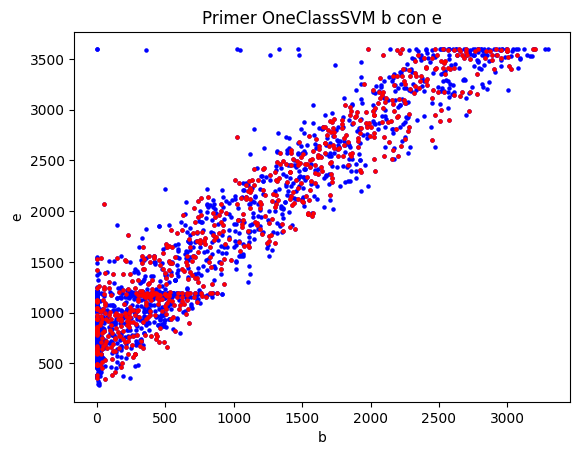

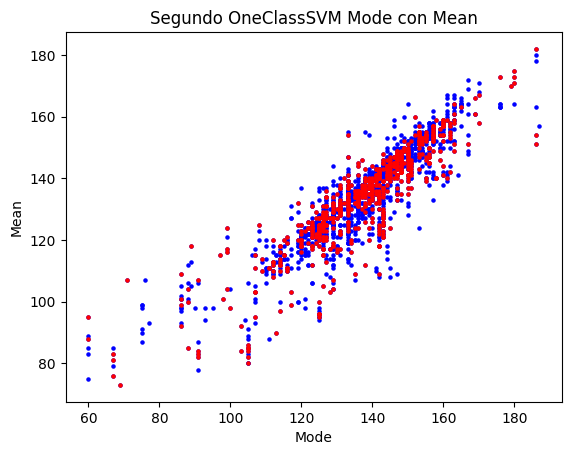

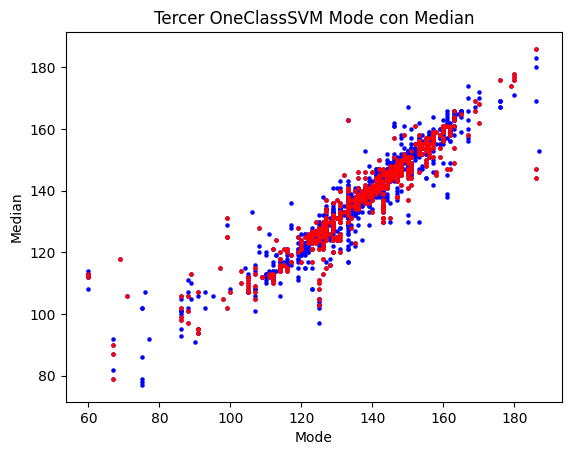

In [47]:
#Primer SVM de las variables b con e
#Se asignan  a1 y b1

# inliers
a1 = plt.scatter(DataOCSVM1['b'], DataOCSVM1['e'], s=5, c='blue')
# outliers
b1 = plt.scatter(outliers_values1['b'], outliers_values1['e'], s=5, c='red')
plt.axis('tight')
plt.xlabel('b');
plt.ylabel('e');
plt.title("Primer OneClassSVM b con e")
plt.show()

#Segundo SVM de las variables Mode con Mean
#Se asignan  a2 y b2

# inliers
a2 = plt.scatter(DataOCSVM2['Mode'], DataOCSVM2['Mean'], s=5, c='blue')
# outliers
b2 = plt.scatter(outliers_values2['Mode'], outliers_values2['Mean'], s=5, c='red')
plt.axis('tight')
plt.xlabel('Mode');
plt.ylabel('Mean');
plt.title("Segundo OneClassSVM Mode con Mean")
plt.show()


#Tercer SVM de las variables Mode con Mean
#Se asignan  a3 y b3

# inliers
a3 = plt.scatter(DataOCSVM3['Mode'], DataOCSVM3['Median'], s=5, c='blue')
# outliers
b3 = plt.scatter(outliers_values3['Mode'], outliers_values3['Median'], s=5, c='red')
plt.axis('tight')
plt.xlabel('Mode');
plt.ylabel('Median');
plt.title("Tercer OneClassSVM Mode con Median")
plt.show()

###APLICACION DE TECNICA DE AGRUPAMIENTO

###4. APLICACION DE TECNICA DE AGRUPAMIENTO

**4.1 Técnica de algoritmos de k-means**

In [48]:
#Cluster de variables b con e
Cluster1 = data1_clean[['b', 'e', 'NSP']]
X_6 = Cluster1.to_numpy()

#Cluster de variables mode con mean
Cluster2 = data1_clean[['Mode', 'Mean', 'NSP']]
X_7 = Cluster1.to_numpy()

#Cluster de variables mode con median
Cluster3 = data1_clean[['Mode', 'Median', 'NSP']]
X_8 = Cluster1.to_numpy()


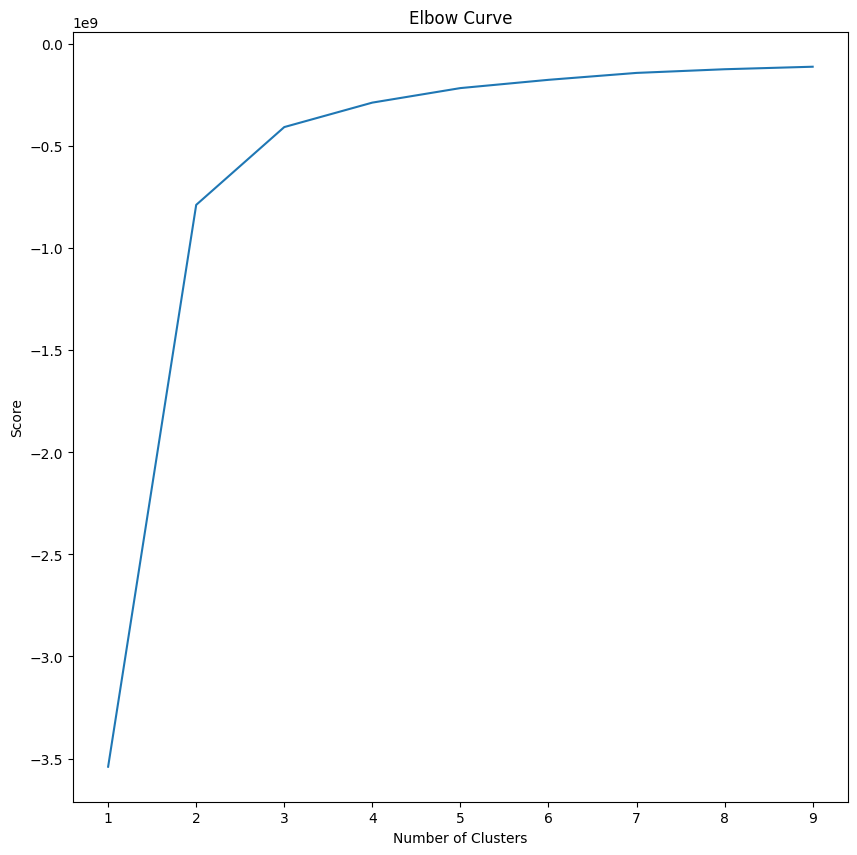

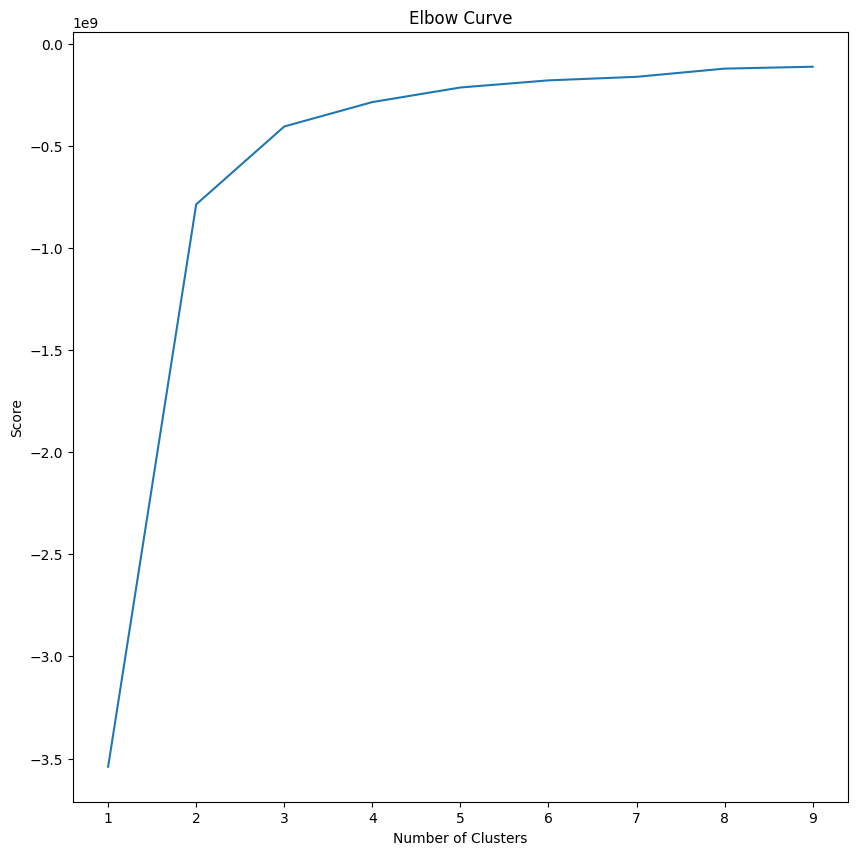

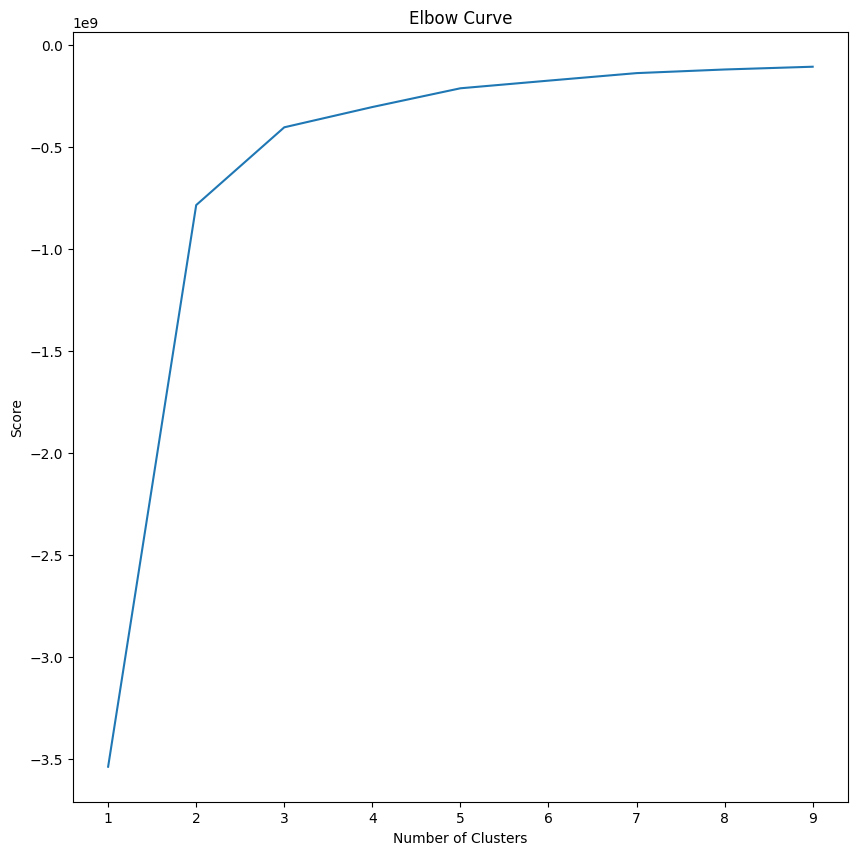

In [49]:
#Cluster de variables b con e
Nc1 = range(1, 10)
kmeans1 = [KMeans(n_clusters=i) for i in Nc1]
kmeans1
score1 = [kmeans1[i].fit(X_6).score(X_6) for i in range(len(kmeans1))]
score1
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(Nc1, score1)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Cluster de variables mode con mean
Nc2 = range(1, 10)
kmeans2 = [KMeans(n_clusters=i) for i in Nc2]
kmeans2
score2 = [kmeans2[i].fit(X_7).score(X_7) for i in range(len(kmeans2))]
score2
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(Nc2, score2)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#Cluster de variables mode con median
Nc3 = range(1, 10)
kmeans3 = [KMeans(n_clusters=i) for i in Nc3]
kmeans3
score3 = [kmeans3[i].fit(X_8).score(X_8) for i in range(len(kmeans3))]
score3
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(Nc3, score3)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [51]:
#Cluster de variables b con e
# 3 es un buen valor
kmeans1 = KMeans(n_clusters=3).fit(X_6)
centroids1 = kmeans1.cluster_centers_

#Cluster de variables mode con mean
# 3 es un buen valor
kmeans2 = KMeans(n_clusters=3).fit(X_7)
centroids2 = kmeans1.cluster_centers_

#Cluster de variables mode con median
# 3 es un buen valor
kmeans3 = KMeans(n_clusters=3).fit(X_8)
centroids3 = kmeans1.cluster_centers_

[0 0 0 ... 2 1 1]
[0 0 0 ... 2 1 1]
[0 0 0 ... 2 1 1]


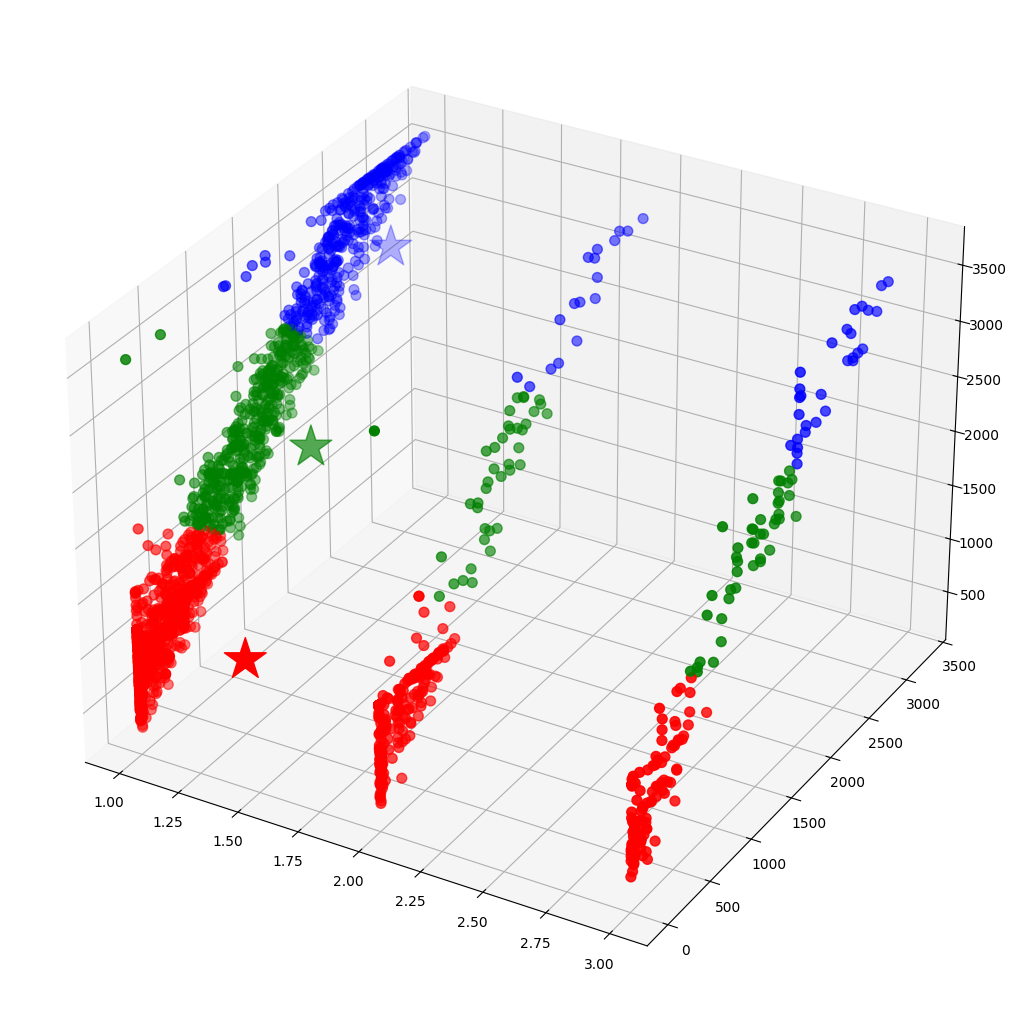

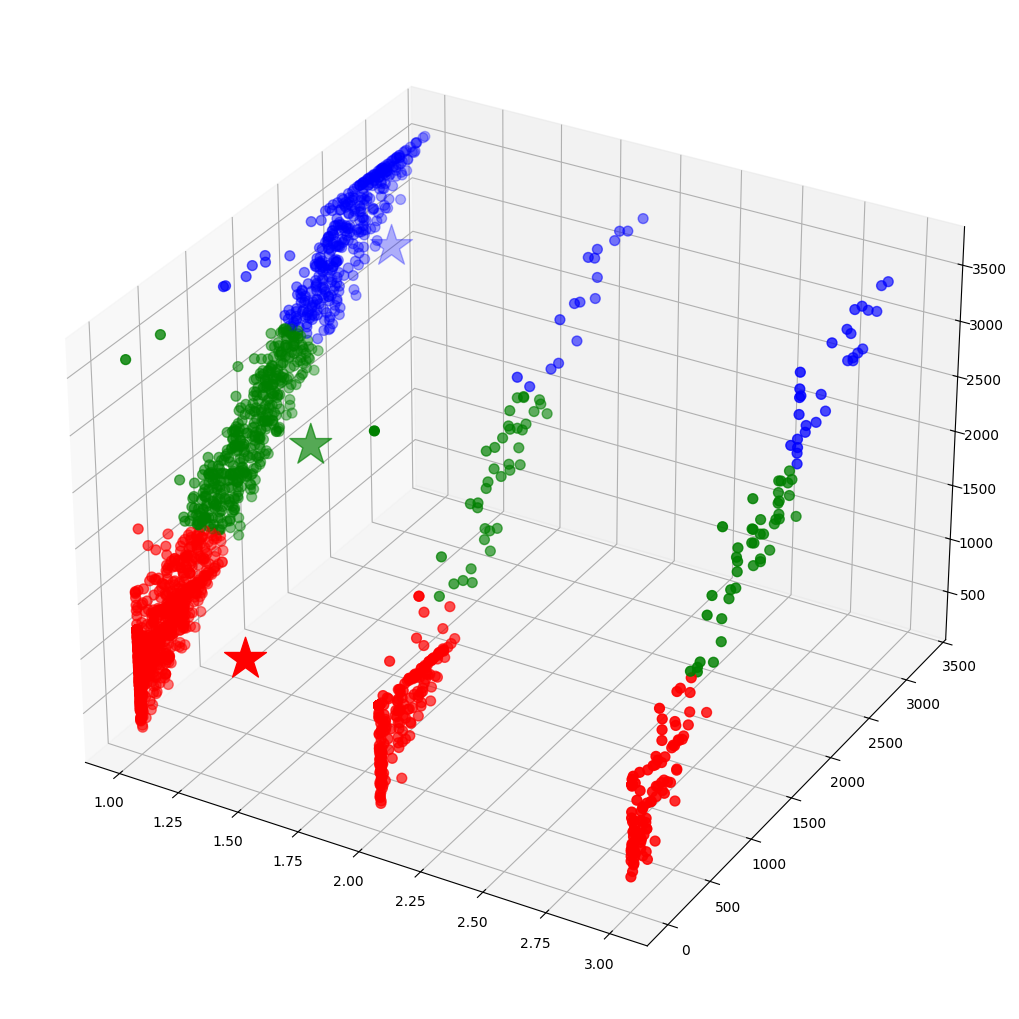

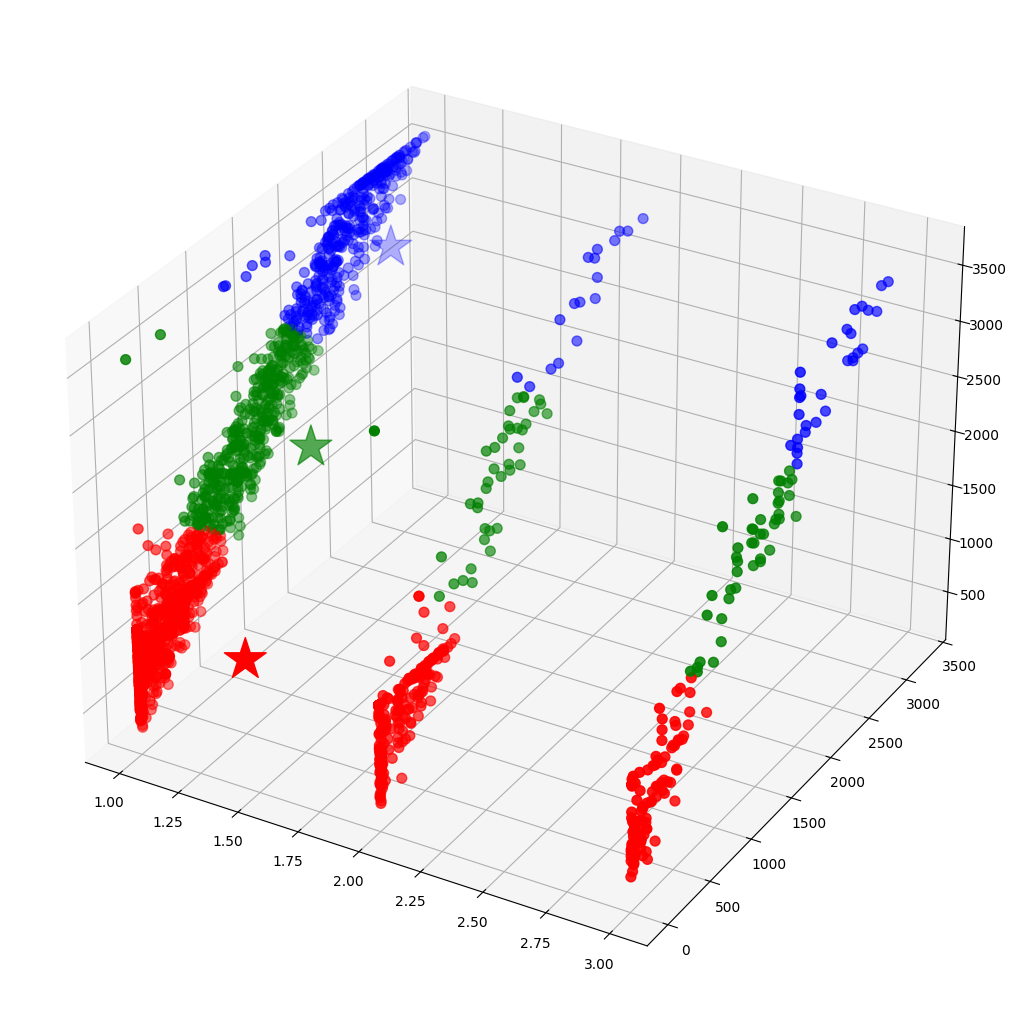

In [52]:
#Cluster de variables b con e
#Graficamos en 3D para ver si es coherente
labels1 = kmeans1.predict(X_6)
print(labels1)
# Getting the cluster centers
C1 = kmeans1.cluster_centers_
colores1=['red', 'blue', 'green']
asignar1=[]
for row in labels1:
    asignar1.append(colores1[row])
fig1 = plt.figure(figsize=(10, 10))
ax1 = Axes3D(fig1, auto_add_to_figure=False)
fig1.add_axes(ax1)
ax1.scatter(X_6[:, 2], X_6[:, 0], X_6[:, 1], c=asignar1, s=50) # Datos
ax1.scatter(C1[:, 2], C1[:, 0], C1[:, 1], marker='*', c=colores1, s=1000); # Centroides

#Cluster de variables mode con mean
#Graficamos en 3D para ver si es coherente
labels2 = kmeans2.predict(X_7)
print(labels2)
# Getting the cluster centers
C2 = kmeans2.cluster_centers_
colores2=['red', 'blue', 'green']
asignar2=[]
for row in labels2:
    asignar2.append(colores2[row])
fig2 = plt.figure(figsize=(10, 10))
ax2 = Axes3D(fig2, auto_add_to_figure=False)
fig2.add_axes(ax2)
ax2.scatter(X_7[:, 2], X_7[:, 0], X_7[:, 1], c=asignar2, s=50) # Datos
ax2.scatter(C2[:, 2], C2[:, 0], C2[:, 1], marker='*', c=colores2, s=1000); # Centroides

#Cluster de variables mode con median
#Graficamos en 3D para ver si es coherente
labels3 = kmeans3.predict(X_8)
print(labels3)
# Getting the cluster centers
C3 = kmeans3.cluster_centers_
colores3=['red', 'blue', 'green']
asignar3=[]
for row in labels3:
    asignar3.append(colores3[row])
fig3 = plt.figure(figsize=(10, 10))
ax3 = Axes3D(fig3, auto_add_to_figure=False)
fig3.add_axes(ax3)
ax3.scatter(X_8[:, 2], X_8[:, 0], X_8[:, 1], c=asignar3, s=50) # Datos
ax3.scatter(C3[:, 2], C3[:, 0], C3[:, 1], marker='*', c=colores3, s=1000); # Centroides

**4.2 Método Agrupación jerarquica aglomerada**

**Dendrograma**


In [53]:
def plot_dendrogram(model, **kwargs):
    # Creación de una matriz de vinculación, para graficar el dendograma
    # Creación de los conteos de las muestras por debajo de cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Gráfico correspondiente al Dendograma
    dendrogram(linkage_matrix, **kwargs)

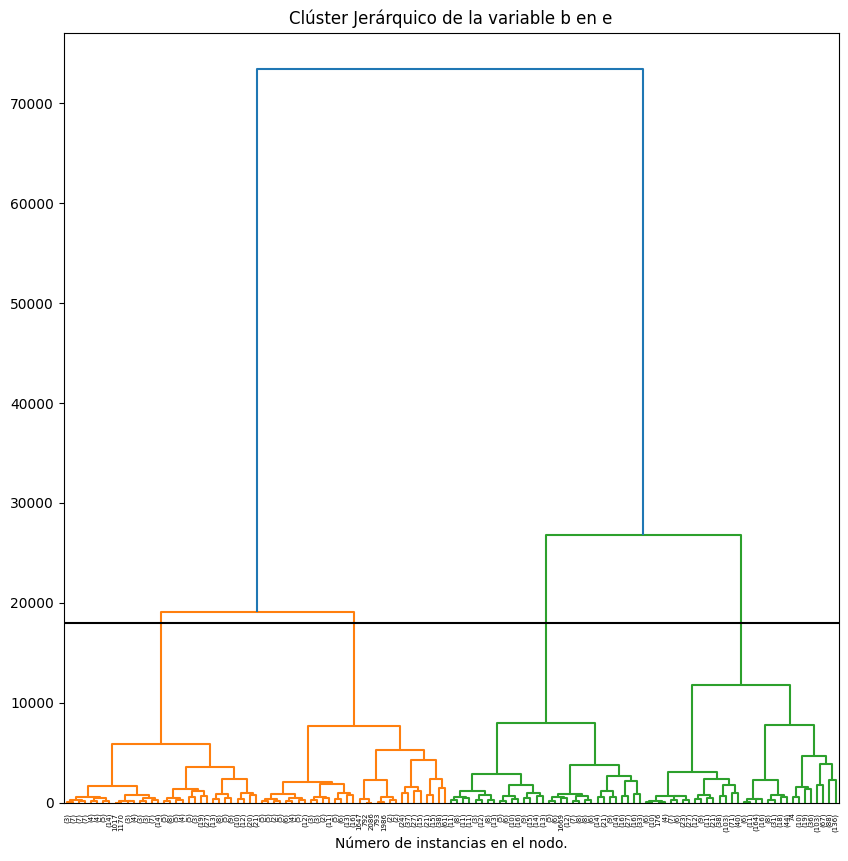

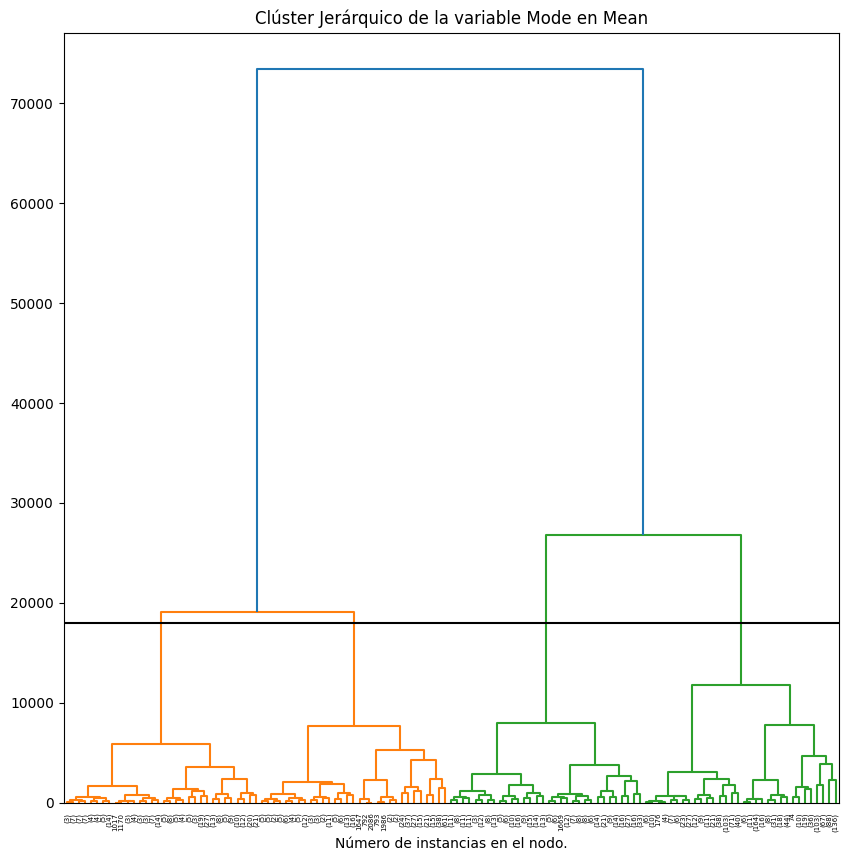

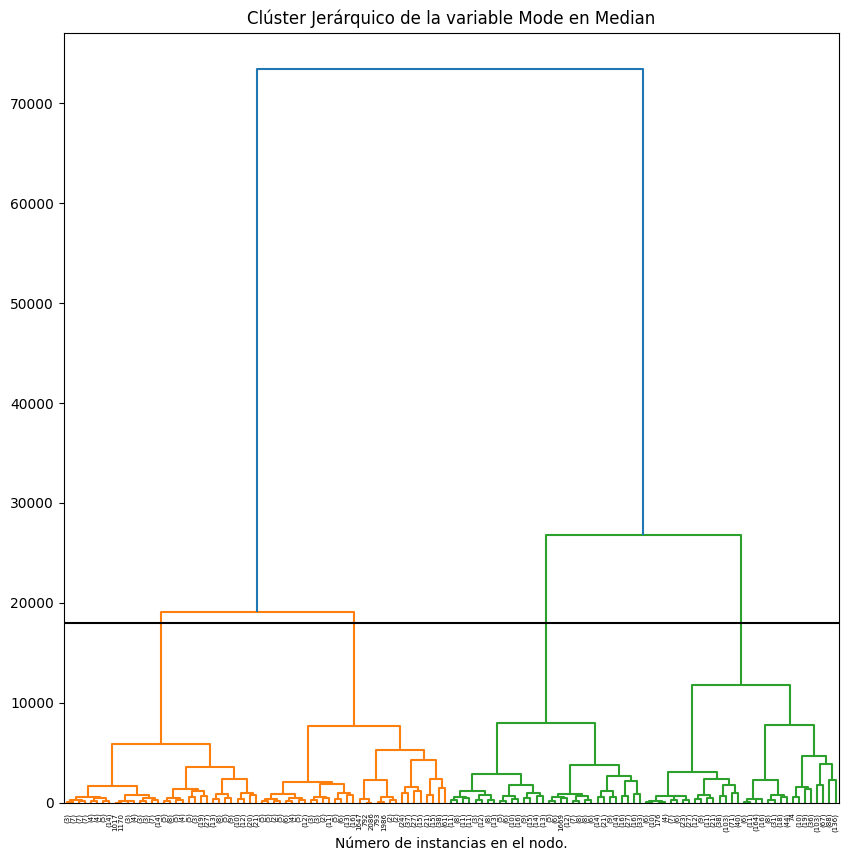

In [54]:
#Clúster Jerárquico de las variables b en e
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model1 = model1.fit(X_6)
plt.title("Clúster Jerárquico de la variable b en e")
plt.rcParams['figure.figsize'] = (10, 10)
# Gráfico de tres niveles del dendograma
plot_dendrogram(model1, truncate_mode="level", p=6)
plt.xlabel("Número de instancias en el nodo.")
# Corte del dendograma en el número max_d
plt.axhline(y=18000, c='k')
plt.show()

#Clúster Jerárquico de las variables mode en mean
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model2 = model2.fit(X_7)
plt.title("Clúster Jerárquico de la variable Mode en Mean")
plt.rcParams['figure.figsize'] = (10, 10)
# Gráfico de tres niveles del dendograma
plot_dendrogram(model2, truncate_mode="level", p=6)
plt.xlabel("Número de instancias en el nodo.")
# Corte del dendograma en el número max_d
plt.axhline(y=18000, c='k')
plt.show()

#Clúster Jerárquico de las variables Mode en Median
model3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model3 = model3.fit(X_8)
plt.title("Clúster Jerárquico de la variable Mode en Median")
plt.rcParams['figure.figsize'] = (10, 10)
# Gráfico de tres niveles del dendograma
plot_dendrogram(model3, truncate_mode="level", p=6)
plt.xlabel("Número de instancias en el nodo.")
# Corte del dendograma en el número max_d
plt.axhline(y=18000, c='k')
plt.show()